In [5]:
%matplotlib inline
import numpy as np
import sygma
import matplotlib.pyplot as plt
from galaxy_analysis.plot.plot_styles import *

import galaxy_analysis.utilities.convert_abundances as ca


def plot_settings():
    fsize = 21
    rc('text',usetex=False)
    rc('font',size=fsize)
    return

In [6]:
sygma.sygma?

In [33]:
s = {}
metallicities = np.flip(np.array([0.02, 0.01, 0.006, 0.001, 0.0001]))

for z in metallicities:
    print(z)
    s[z] = sygma.sygma(iniZ = z, sn1a_on=False, #sn1a_rate='maoz',
                       #iniabu_table = 'yield_tables/iniabu/iniab1.0E-02GN93.ppn',
                       imf_yields_range=[1,25],
                       table = 'yield_tables/agb_and_massive_stars_C15_LC18_R_mix_resampled.txt',
                       mgal = 1.0)


0.0001
SYGMA run in progress..
   SYGMA run completed - Run time: 0.17s
0.001
SYGMA run in progress..
   SYGMA run completed - Run time: 0.21s
0.006
SYGMA run in progress..
   SYGMA run completed - Run time: 0.16s
0.01
SYGMA run in progress..
   SYGMA run completed - Run time: 0.18s
0.02
SYGMA run in progress..
   SYGMA run completed - Run time: 0.16s


In [34]:
yields = {}
yields_agb = {}
yields_no_agb = {}
for z in metallicities:
    yields[z] = {}
    yields_agb[z] = {}
    yields_no_agb[z] = {}
    for i,e in enumerate(s[z].history.elements):
        index = s[z].history.elements.index(e)
        yields[z][e] = np.array(s[z].history.ism_elem_yield)[:,index]
        yields_agb[z][e] = np.array(s[z].history.ism_elem_yield_agb)[:,index]
        yields_no_agb[z][e] = yields[z][e] - yields_agb[z][e]


In [35]:
for z in metallicities:
    print(np.array(s[0.0001].history.

SyntaxError: unexpected EOF while parsing (<ipython-input-35-07f7f081ffa3>, line 2)

In [36]:
colors = {0.0001: 'C0',
          0.001 : 'C1',
          0.01  : 'C2',
          0.02  : 'C3'}


colors = {}
for i,z in enumerate(metallicities):
    colors[z] = magma((i+1)/(1.0*np.size(metallicities)+1))

In [37]:
colors

{0.0001: (0.171713, 0.067305, 0.370771, 1.0),
 0.001: (0.445163, 0.122724, 0.506901, 1.0),
 0.006: (0.716387, 0.214982, 0.47529, 1.0),
 0.01: (0.944006, 0.377643, 0.365136, 1.0),
 0.02: (0.997077, 0.690088, 0.471811, 1.0)}

/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


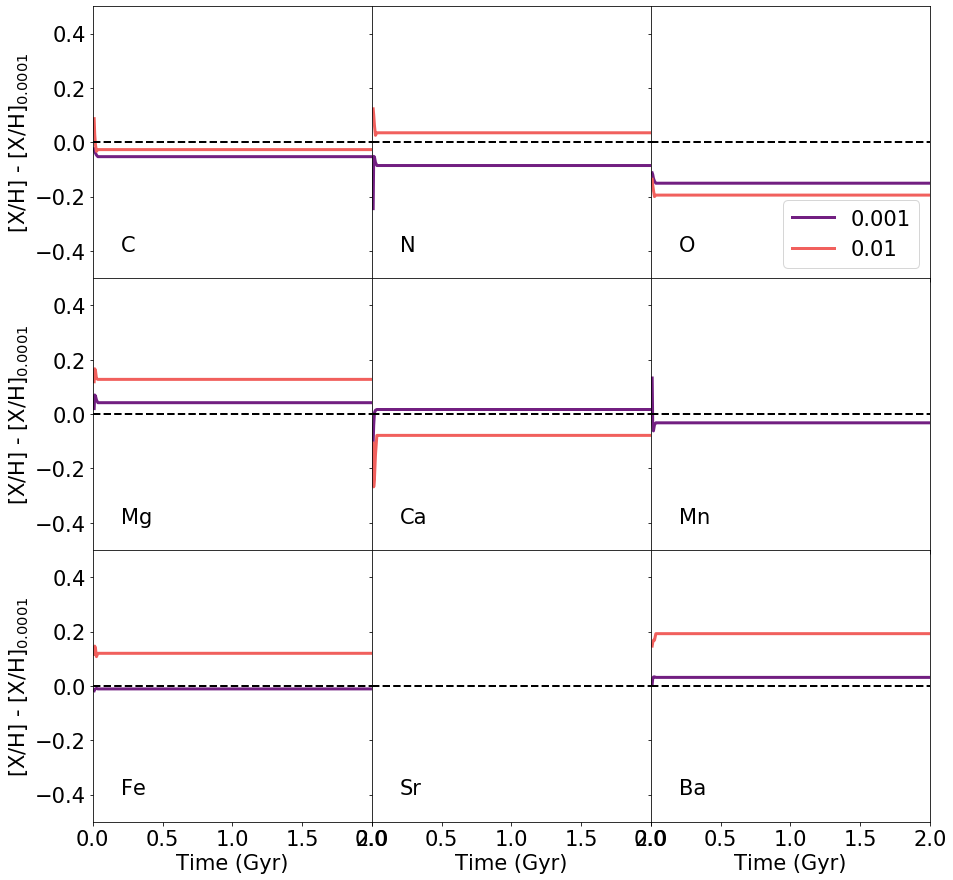

In [38]:
plot_settings()

plot_elements = ['C','N','O','Mg','Ca','Mn','Fe','Sr','Ba']

fig, all_ax = plt.subplots(3,3,sharex=True,sharey=True)
fig.subplots_adjust(wspace=0,hspace=0)
fig.set_size_inches(5*3,5*3)

count = 0
for ax2 in all_ax:
    for ax in ax2:
        
        e = plot_elements[count]
        
        for z in [0.001,0.01]: # metallicities:
            
            label = z
            
            ax.plot(s[z].history.age[1:]/1.0E9, np.log10(yields_no_agb[z][e][1:] / yields_no_agb[0.0001][e][1:]),
                    lw = 3, color = colors[z], label = label)
            
        
        
       # ax.semilogy()
        #ax.set_ylim(0,2)
        
        xy=(0.1,0.1)
        ax.annotate(e,xy,xy,xycoords='axes fraction')
        
        if e == 'O':
            ax.legend(loc='lower right')
        
        count += 1
        ax.set_xlim(0,2.0)
        
        #ax.semilogy()
        ax.set_ylim(-0.5,0.5)
        ax.plot(ax.get_xlim(), [0,0], lw=2,ls='--',color='black')
        
for i in np.arange(3):
    all_ax[(2,i)].set_xlabel('Time (Gyr)')
    all_ax[(i,0)].set_ylabel(r'[X/H] - [X/H]$_{0.0001}$')

    
fig.savefig("X_H_lowz_comparison.png")

In [10]:
plot_settings()

plot_elements = ['C','N','O','Mg','Ca','Mn','Fe','Sr','Ba']

denom = 'Mg'

fig, all_ax = plt.subplots(3,3,sharex=True,sharey=True)
fig.subplots_adjust(wspace=0,hspace=0)
fig.set_size_inches(5*3,5*3)

count = 0
for ax2 in all_ax:
    for ax in ax2:
        
        e = plot_elements[count]
        
        for z in [0.0001,0.001,0.01]: # metallicities:
            
            label = z
            
            yvals = ca.abundance_ratio_array(e,
                                             yields_no_agb[z][e][1:], 
                                             denom, yields_no_agb[z][denom][1:],input_type='mass')
            
            yvals2 = ca.abundance_ratio_array(e,
                                             yields_no_agb[0.0001][e][1:], 
                                             denom, yields_no_agb[0.0001][denom][1:],input_type='mass')
            
            if z == 0.0001 and e == 'Ca':            
                print(yvals)
            ax.plot(s[z].history.age[1:]/1.0E9, yvals,# - yvals2,
                    lw = 3, color = colors[z], label = label)
            
        
        
       # ax.semilogy()
        ax.set_ylim(-1,1)
        xy=(0.1,0.1)
        ax.annotate(e,xy,xy,xycoords='axes fraction')
        
        if e == 'O':
            ax.legend(loc='lower right')
        
        count += 1
        ax.set_xlim(0,0.250)
        ax.plot(ax.get_xlim(),[0.0,0.0],lw=2,ls='--',color='black')
        
        
for i in np.arange(3):
    all_ax[(2,i)].set_xlabel('Time (Gyr)')
    all_ax[(i,0)].set_ylabel(r'[X/Fe] - [X/Fe]$_{0.0001}$')

fig.savefig("X_Mg.png")    
#fig.savefig("X_Fe_lowz_comparison.png")

/home/aemerick/code/galaxy_analysis/utilities/convert_abundances.py:122: RuntimeWarning: invalid value encountered in double_scalars
  aratio = np.log10(x1_abund / x2_abund) - (x1_solar - x2_solar) # np.log10( x1_solar / x2_solar)
/home/aemerick/code/galaxy_analysis/utilities/convert_abundances.py:122: RuntimeWarning: invalid value encountered in double_scalars
  aratio = np.log10(x1_abund / x2_abund) - (x1_solar - x2_solar) # np.log10( x1_solar / x2_solar)
/home/aemerick/code/galaxy_analysis/utilities/convert_abundances.py:122: RuntimeWarning: invalid value encountered in double_scalars
  aratio = np.log10(x1_abund / x2_abund) - (x1_solar - x2_solar) # np.log10( x1_solar / x2_solar)
/home/aemerick/code/galaxy_analysis/utilities/convert_abundances.py:122: RuntimeWarning: invalid value encountered in double_scalars
  aratio = np.log10(x1_abund / x2_abund) - (x1_solar - x2_solar) # np.log10( x1_solar / x2_solar)
/home/aemerick/code/galaxy_analysis/utilities/convert_abundances.py:122: Run

[        nan         nan         nan         nan         nan         nan
         nan -1.45302298 -0.60486278 -0.16687444  0.08521952  0.22160982
  0.22160982  0.22160982  0.22160982  0.22160982  0.22160982  0.22160982
  0.22160982  0.22160982  0.22160982  0.22160982  0.22160982  0.22160982
  0.22160982  0.22160982  0.22160982  0.22160982  0.22160982  0.22160982]


In [65]:
s1 = s[0.001]

In [66]:
np.array(s1.history.sn1a_numbers)[ (s1.history.age/ 1.0E9 < 1.1)] * 5.0E4

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

TypeError: object of type 'int' has no len()

In [100]:
def wd_mass(mproj, model = 'salaris'):
    
    if np.size(mproj) == 1:
        mproj = np.array([mproj])
    
    wd = np.zeros(np.size(mproj))
    
    
    if model == 'salaris':
        wd[mproj <  4.0] = 0.134 * mproj[mproj < 4.0] + 0.331
        wd[mproj >= 4.0] = 0.047 * mproj[mproj >= 4.0] + 0.679
    elif model == 'mist':
        wd[mproj < 2.85] = 0.08*mproj[mproj<2.85]+0.489
        select=(mproj>2.85)*(mproj<3.6)
        wd[select]=0.187*mproj[select]+0.184
        select=(mproj>3.6)
        wd[select]=0.107*mproj[select]+0.471
    
    return wd


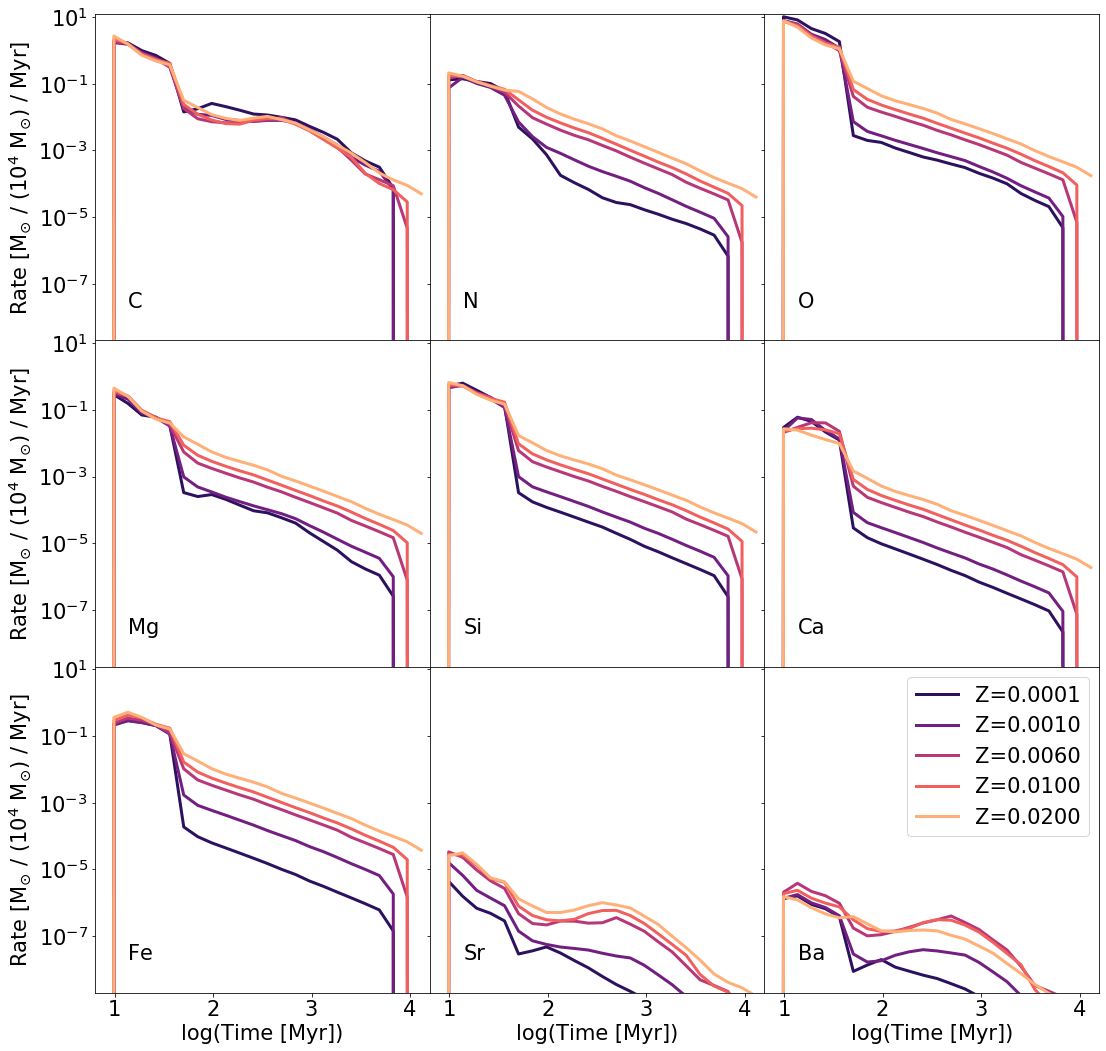

In [41]:
plot_settings()

plot_elements = ['C','N','O','Mg','Si','Ca','Fe','Sr','Ba']

fig, all_ax = plt.subplots(3,3,sharex=True,sharey=True)
fig.subplots_adjust(wspace=0,hspace=0)
fig.set_size_inches(6*3,6*3)

count = 0
for ax2 in all_ax:
    for ax in ax2:
        
        e = plot_elements[count]
        
        for z in metallicities: #[0.0001,0.001,0.01,0.02]: # metallicities:
            
            label = "Z=%.4f"%(z)
            
            y = 1.0E4 * 1.0E6 * (yields[z][e][1:] - yields[z][e][:-1]) / (s[z].history.age[1:] - s[z].history.age[:-1])
            
            ax.plot(np.log10(s[z].history.age[1:]/1.0E6), y,
                    #np.log10(yields_no_agb[z][e][1:] / yields_no_agb[0.0001][e][1:]),
                    lw = 3, color = colors[z], label = label)
            
        
        
       # ax.semilogy()
        #ax.set_ylim(0,2)
        
    
        xy=(0.1,0.1)
        ax.annotate(e,xy,xy,xycoords='axes fraction')
        
        if e == 'Ba':
            ax.legend(loc='upper right')
        
        count += 1
        ax.set_xlim(0.8,4.2)
        
        #ax.semilogx()
        ax.semilogy()
        
        ax.set_ylim(2.0E-9,12.0)
        ax.plot(ax.get_xlim(), [0,0], lw=2,ls='--',color='black')
        
for i in np.arange(3):
    all_ax[(2,i)].set_xlabel('log(Time [Myr])')
    all_ax[(i,0)].set_ylabel(r'Rate [M$_{\odot}$ / (10$^4$ M$_{\odot}$) / Myr]')

    
fig.savefig("C15_LC18_yields_rate.png")

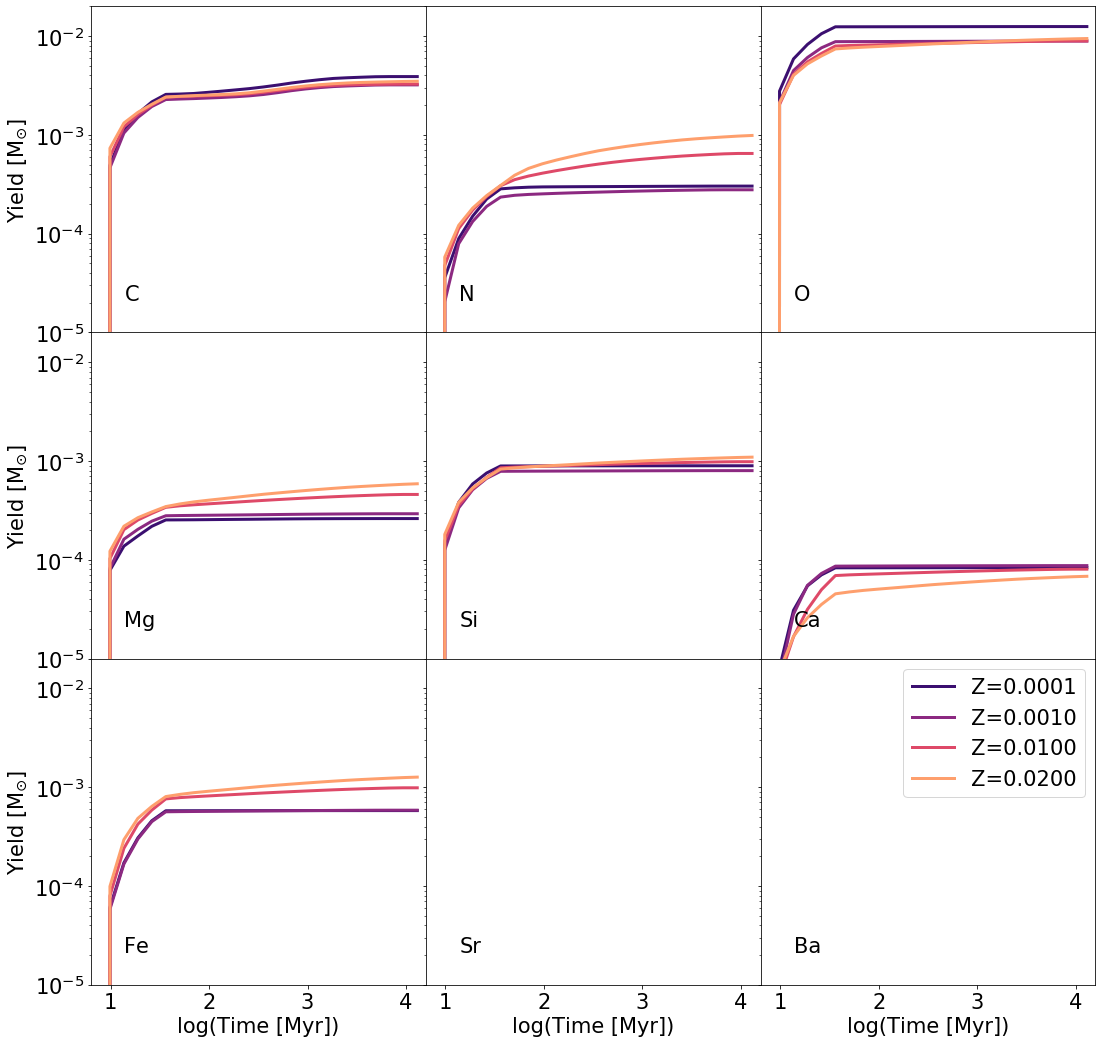

In [12]:
plot_settings()

plot_elements = ['C','N','O','Mg','Si','Ca','Fe','Sr','Ba']

fig, all_ax = plt.subplots(3,3,sharex=True,sharey=True)
fig.subplots_adjust(wspace=0,hspace=0)
fig.set_size_inches(6*3,6*3)

count = 0
for ax2 in all_ax:
    for ax in ax2:
        
        e = plot_elements[count]
        
        for z in [0.0001,0.001,0.01,0.02]: # metallicities:
            
            label = "Z=%.4f"%(z)
            
            #y = 1.0E4 * 1.0E6 * (yields[z][e][1:] - yields[z][e][:-1]) / (s[z].history.age[1:] - s[z].history.age[:-1])
            y = yields[z][e][1:]
            ax.plot(np.log10(s[z].history.age[1:]/1.0E6), y,
                    #np.log10(yields_no_agb[z][e][1:] / yields_no_agb[0.0001][e][1:]),
                    lw = 3, color = colors[z], label = label)
            
        
        
       # ax.semilogy()
        #ax.set_ylim(0,2)
        
    
        xy=(0.1,0.1)
        ax.annotate(e,xy,xy,xycoords='axes fraction')
        
        if e == 'Ba':
            ax.legend(loc='upper right')
        
        count += 1
        ax.set_xlim(0.8,4.2)
        
        #ax.semilogx()
        ax.semilogy()
        
        ax.set_ylim(1.0E-5,2.0E-2)
        ax.plot(ax.get_xlim(), [0,0], lw=2,ls='--',color='black')
        
for i in np.arange(3):
    all_ax[(2,i)].set_xlabel('log(Time [Myr])')
    all_ax[(i,0)].set_ylabel(r'Yield [M$_{\odot}$]') #/ (10$^4$ M$_{\odot}$)]')

    
fig.savefig("C15_LC18_yields_total.png")

In [ ]:
plot_settings()

plot_elements = ['C','N','O','Mg','Si','Ca','Fe','Sr','Ba']

fig, all_ax = plt.subplots(3,3,sharex=True,sharey=True)
fig.subplots_adjust(wspace=0,hspace=0)
fig.set_size_inches(6*3,6*3)

count = 0
for ax2 in all_ax:
    for ax in ax2:
        
        e = plot_elements[count]
        
        for z in [0.0001,0.001,0.01,0.02]: # metallicities:
            
            label = "Z=%.4f"%(z)
            
            #y = 1.0E4 * 1.0E6 * (yields[z][e][1:] - yields[z][e][:-1]) / (s[z].history.age[1:] - s[z].history.age[:-1])
            y = 1.0E4 * yields[z][e][1:]
            ax.plot(np.log10(s[z].history.age[1:]/1.0E6), y,
                    #np.log10(yields_no_agb[z][e][1:] / yields_no_agb[0.0001][e][1:]),
                    lw = 3, color = colors[z], label = label)
            
        
        
       # ax.semilogy()
        #ax.set_ylim(0,2)
        
    
        xy=(0.1,0.1)
        ax.annotate(e,xy,xy,xycoords='axes fraction')
        
        if e == 'Ba':
            ax.legend(loc='upper right')
        
        count += 1
        ax.set_xlim(0.8,4.2)
        
        #ax.semilogx()
        ax.semilogy()
        
        ax.set_ylim(1.0E-6,1.0E3)
        ax.plot(ax.get_xlim(), [0,0], lw=2,ls='--',color='black')
        
for i in np.arange(3):
    all_ax[(2,i)].set_xlabel('log(Time [Myr])')
    all_ax[(i,0)].set_ylabel(r'Yield [M$_{\odot}$ / (10$^4$ M$_{\odot}$)]')

    
fig.savefig("C15_LC18_yields_total.png")

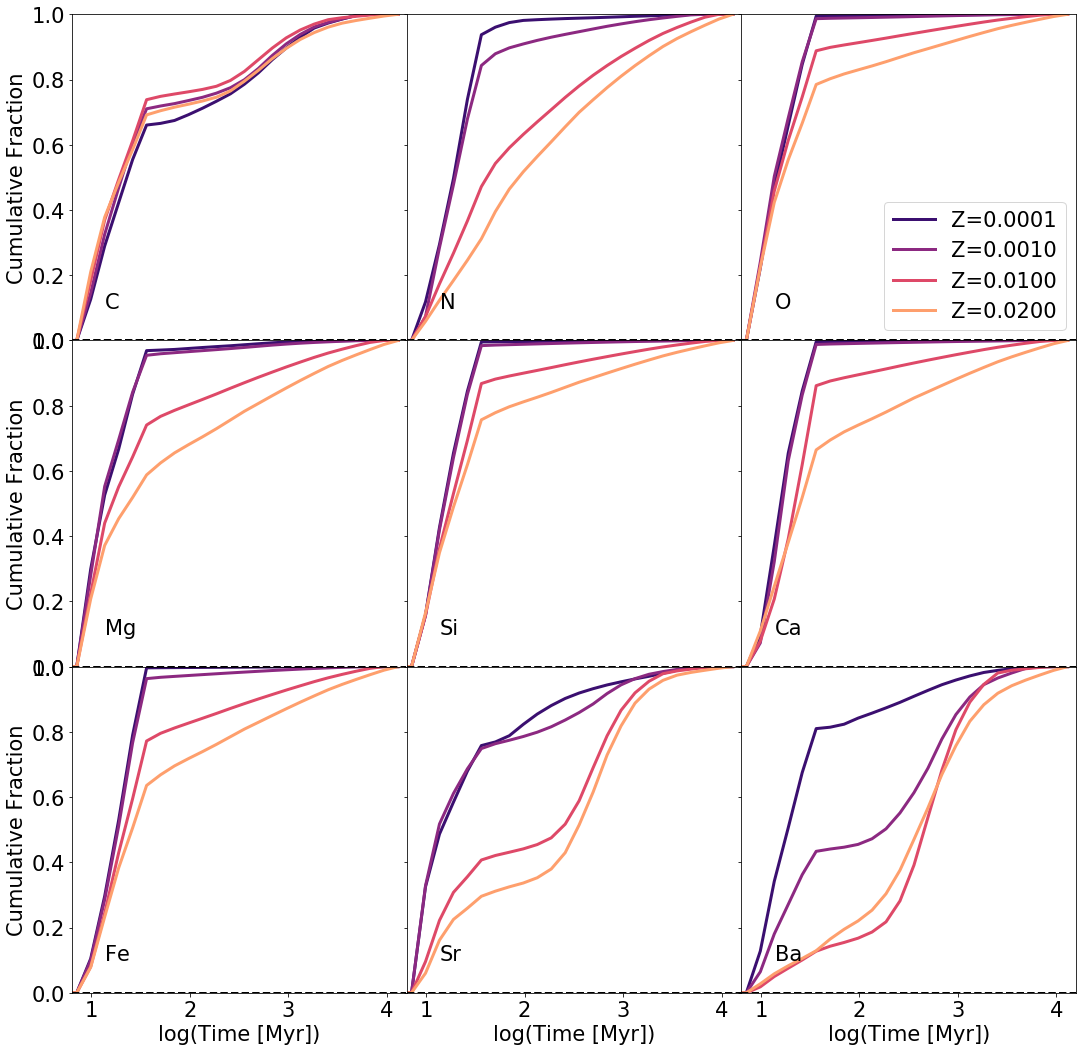

In [13]:
plot_settings()

plot_elements = ['C','N','O','Mg','Si','Ca','Fe','Sr','Ba']

fig, all_ax = plt.subplots(3,3,sharex=True,sharey=True)
fig.subplots_adjust(wspace=0,hspace=0)
fig.set_size_inches(6*3,6*3)

count = 0
for ax2 in all_ax:
    for ax in ax2:
        
        e = plot_elements[count]
        
        for z in [0.0001,0.001,0.01,0.02]: # metallicities:
            
            label = "Z=%.4f"%(z)
            
            #y = 1.0E4 * 1.0E6 * (yields[z][e][1:] - yields[z][e][:-1]) / (s[z].history.age[1:] - s[z].history.age[:-1])
            y = yields[z][e][1:] / yields[z][e][-1]
            ax.plot(np.log10(s[z].history.age[1:]/1.0E6), y,
                    #np.log10(yields_no_agb[z][e][1:] / yields_no_agb[0.0001][e][1:]),
                    lw = 3, color = colors[z], label = label)
            
        
        
       # ax.semilogy()
        #ax.set_ylim(0,2)
        
    
        xy=(0.1,0.1)
        ax.annotate(e,xy,xy,xycoords='axes fraction')
        
        if e == 'O':
            ax.legend(loc='lower right')
        
        count += 1
        ax.set_xlim(0.8,4.2)
        
        #ax.semilogx()
        #ax.semilogy()
        
        ax.set_ylim(0,1.0)
        ax.plot(ax.get_xlim(), [0,0], lw=2,ls='--',color='black')
        
for i in np.arange(3):
    all_ax[(2,i)].set_xlabel('log(Time [Myr])')
    all_ax[(i,0)].set_ylabel(r'Cumulative Fraction')

    
fig.savefig("C15_LC18_yields_fraction.png")

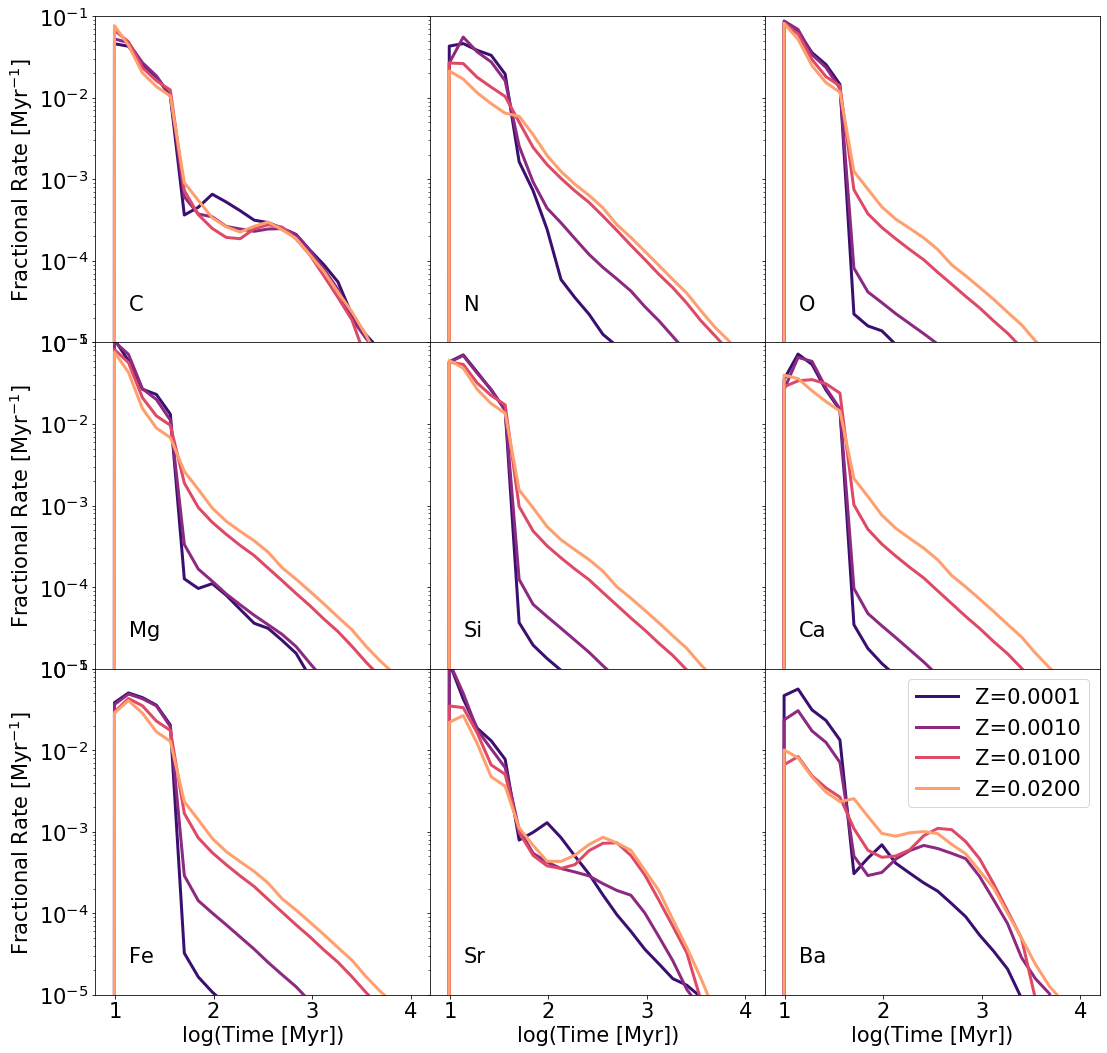

In [75]:
plot_settings()

plot_elements = ['C','N','O','Mg','Si','Ca','Fe','Sr','Ba']

fig, all_ax = plt.subplots(3,3,sharex=True,sharey=True)
fig.subplots_adjust(wspace=0,hspace=0)
fig.set_size_inches(6*3,6*3)

count = 0
for ax2 in all_ax:
    for ax in ax2:
        
        e = plot_elements[count]
        
        for z in [0.0001,0.001,0.01,0.02]: # metallicities:
            
            label = "Z=%.4f"%(z)
            
            y = 1.0E6 * (yields[z][e][1:] - yields[z][e][:-1]) / (s[z].history.age[1:] - s[z].history.age[:-1]) / yields[z][e][-1]
            
            ax.plot(np.log10(s[z].history.age[1:]/1.0E6), y,
                    #np.log10(yields_no_agb[z][e][1:] / yields_no_agb[0.0001][e][1:]),
                    lw = 3, color = colors[z], label = label)
            
        
        
       # ax.semilogy()
        #ax.set_ylim(0,2)
        
    
        xy=(0.1,0.1)
        ax.annotate(e,xy,xy,xycoords='axes fraction')
        
        if e == 'Ba':
            ax.legend(loc='upper right')
        
        count += 1
        ax.set_xlim(0.8,4.2)
        
        #ax.semilogx()
        ax.semilogy()
        
        ax.set_ylim(1.0E-5,1.0E-1)
        ax.plot(ax.get_xlim(), [0,0], lw=2,ls='--',color='black')
        
for i in np.arange(3):
    all_ax[(2,i)].set_xlabel('log(Time [Myr])')
    all_ax[(i,0)].set_ylabel(r'Fractional Rate [Myr$^{-1}$]')

    
fig.savefig("C15_LC18_yields_fractional_rate.png")